In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import StackedCylinders

plt.style.use("~/evanstyle.mplstyle")

# Large system HFE model

(0, 48)


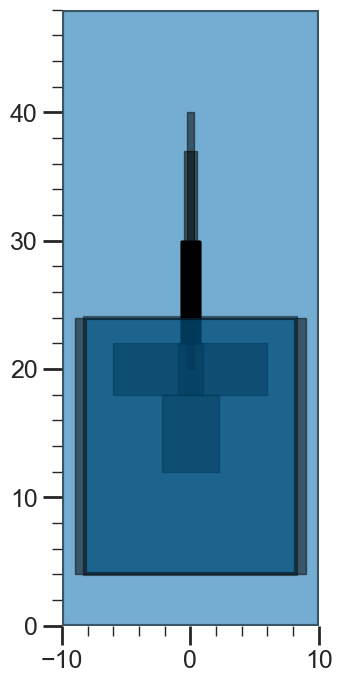

<Axes: >

In [61]:
stack = StackedCylinders.StackedCylinders(unit='inches')
#dewar volume
stack.add_cylinder(radius=10, height=48, is_displacing=False)

#SiPM array
stack.add_cylinder(radius=4.5/2, height=6, is_displacing=True, z=12)
#TPC
stack.add_cylinder(radius=6, height=4, is_displacing=True, z=12+6)
#8 amplifier cans
for i in range(8):
    stack.add_cylinder(radius=0.75, height=8, is_displacing=True, z=12+6+4)

#inlet tube
stack.add_cylinder(radius=0.25, height=20, is_displacing=True, z=12+6+2)

#recirc heater
stack.add_cylinder(radius=1, height=4, is_displacing=True, z=12+6)
stack.add_cylinder(radius=0.5, height=15, is_displacing=True, z=12+6+4)

#now hacking the system a bit, because the heat exchanger
#is significant but is technically a cylindrical shell. 
#treat it as an additional non-displacing volume (which adds physical
# volume to the calculation) and then subtract one at the same location 
#but there are inverse-volumes added to make sure it doesn't get double
#counted because the HEX doesn't go around 2*pi. Half the volume of a cylinder
#with the same height as another can be found by taking the radius to R/sqrt(2)
stack.add_cylinder(radius=9, height=20, is_displacing=True, z=4)
#this is half the volume of a cylinder with the same height
stack.add_cylinder(radius=9/np.sqrt(2), height=20, is_displacing=False, z=4)
#then we add a nondisplacing volume to cut a cylindrical shell into is thick cylinder
stack.add_cylinder(radius=8.25, height=20, is_displacing=False, z=4)
stack.add_cylinder(radius=8.25/np.sqrt(2), height=20, is_displacing=True, z=4)

stack.plot_configuration()


In [ ]:
stack.plot_volume_vs_height(density=1.4) #kg/L density for mass calculation

# Purity monitor in Large System

(0, 48)


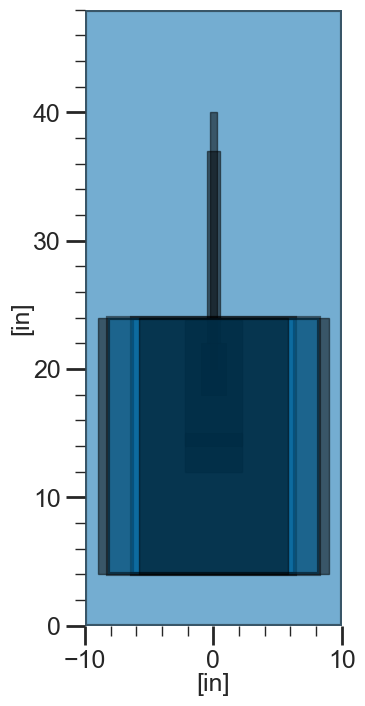

<Axes: xlabel='[in]', ylabel='[in]'>

In [9]:
stack = StackedCylinders.StackedCylinders(unit='inches')
#dewar volume
stack.add_cylinder(radius=10, height=48, is_displacing=False)

#Purity monitor main can
stack.add_cylinder(radius=4.5/2, height=9.84, is_displacing=True, z=14)

#Extra side tube 
stack.add_cylinder(radius=4.5/2, height=3, is_displacing=True, z=12)

#inlet tube
stack.add_cylinder(radius=0.25, height=20, is_displacing=True, z=12+6+2)

#recirc heater
stack.add_cylinder(radius=1, height=4, is_displacing=True, z=12+6)
stack.add_cylinder(radius=0.5, height=15, is_displacing=True, z=12+6+4)

#now hacking the system a bit, because the heat exchanger
#is significant but is technically a cylindrical shell. 
#treat it as an additional non-displacing volume (which adds physical
# volume to the calculation) and then subtract one at the same location 
#but there are inverse-volumes added to make sure it doesn't get double
#counted because the HEX doesn't go around 2*pi. Half the volume of a cylinder
#with the same height as another can be found by taking the radius to R/sqrt(2)
stack.add_cylinder(radius=9, height=20, is_displacing=True, z=4)
#this is half the volume of a cylinder with the same height
stack.add_cylinder(radius=9/np.sqrt(2), height=20, is_displacing=False, z=4)
#then we add a nondisplacing volume to cut a cylindrical shell into is thick cylinder
stack.add_cylinder(radius=8.25, height=20, is_displacing=False, z=4)
stack.add_cylinder(radius=8.25/np.sqrt(2), height=20, is_displacing=True, z=4)

stack.plot_configuration()


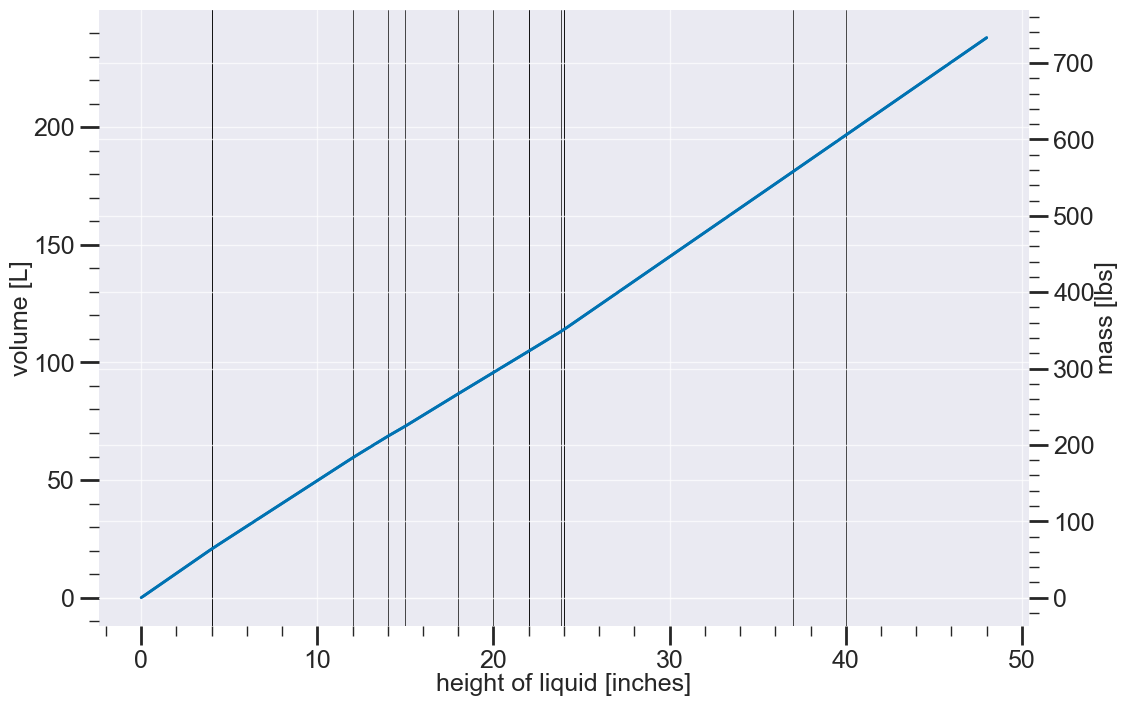

<Axes: xlabel='height of liquid [inches]', ylabel='volume [L]'>

In [8]:
stack.plot_volume_vs_height(density=1.4) #kg/L density for mass calculation

# Small System with HV chamber 

(0, 46)


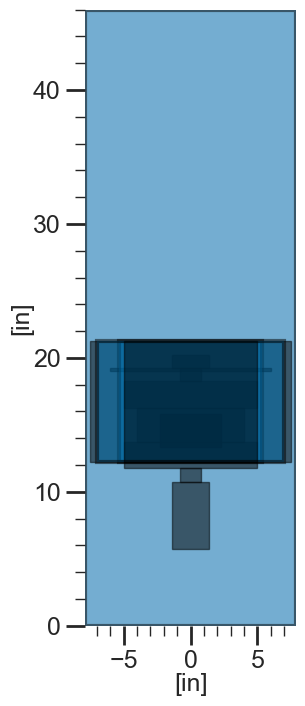

<Axes: xlabel='[in]', ylabel='[in]'>

In [10]:
stack = StackedCylinders.StackedCylinders(unit='inches')
#dewar volume
stack.add_cylinder(radius=15.75/2, height=46, is_displacing=False)

off = 46-42.75 #inches from bottom of dewar to the heat exchanger bottom
#Feedthrough on bottom
stack.add_cylinder(radius=2.75/2, height=5, is_displacing=True, z=off+2.5)
stack.add_cylinder(radius=1.5/2, height=1, is_displacing=True, z=off+2.5+5)
#TPC
stack.add_cylinder(radius=5, height=2, is_displacing=True, z=off+8.5)
stack.add_cylinder(radius=4, height=2.5, is_displacing=True, z=off+8.5+2)
stack.add_cylinder(radius=5, height=2, is_displacing=True, z=off+8.5+2+2.5)

#top feedthrough
stack.add_cylinder(radius=1.5/2, height=1, is_displacing=True, z=off+15)
stack.add_cylinder(radius=2.75/2, height=1, is_displacing=True, z=off+15+1)


#PMT feedthroughs, on their side but in the middle of TPC 
stack.add_cylinder(radius=4.5/2, height=2.5, is_displacing=True, z=off+8+(6.25/3))
stack.add_cylinder(radius=4.5/2, height=2.5, is_displacing=True, z=off+8+(6.25/3))
#G10 piece
stack.add_cylinder(radius=12/2, height=0.25, is_displacing=True, z=off+8+6.25+1.5)

#now hacking the system a bit, because the heat exchanger
#is significant but is technically a cylindrical shell. 
#treat it as an additional non-displacing volume (which adds physical
# volume to the calculation) and then subtract one at the same location 
stack.add_cylinder(radius=15/2, height=9, is_displacing=True, z=off + 9)
stack.add_cylinder(radius=15/2/np.sqrt(2), height=9, is_displacing=False, z=off + 9)
stack.add_cylinder(radius=15/2 - 0.5, height=9, is_displacing=False, z=off + 9)
stack.add_cylinder(radius=(15/2 - 0.5)/np.sqrt(2), height=9, is_displacing=True, z=off + 9)

stack.plot_configuration()


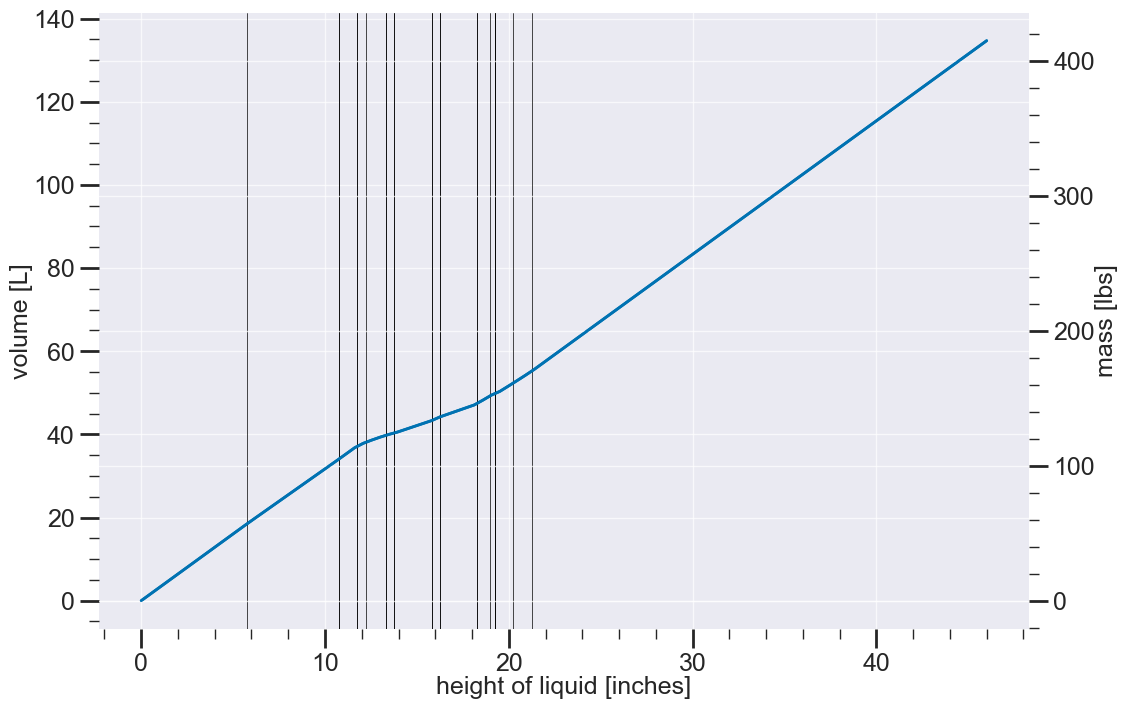

<Axes: xlabel='height of liquid [inches]', ylabel='volume [L]'>

In [10]:
stack.plot_volume_vs_height(density=1.4) #kg/L density for mass calculation